In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
assets = ['CBU','^GDAXI', 'SnP500', 'GOOG', 'XLE', '^STOXX', '^N225', '^BSESN', '^FTSE', 'TXGE', 'BTC-USD']

In [5]:
asset = '^GDAXI'
df_sentiment = pd.read_csv(f'Sentiments1/{asset}_newsSentiment.csv')
df_result = pd.read_csv(f'LLaMA3.3_results/{asset}_predictions_full_3.3.csv')

In [6]:
df_sentiment

,Date,News,Sentiment
0,2024-01-02,The Year of the Rebound - Trackinsight JSE vs ...,-0.20
1,2024-01-03,The Year of the Rebound - Trackinsight JSE vs ...,0.05
2,2024-01-04,BOP to launch ‘SME Environment & Performance I...,0.00
3,2024-01-07,DAX Index: German Factory Orders and Trade Ter...,0.05
4,2024-01-08,DAX Index: German Factory Orders and Trade Ter...,0.05
...,...,...,...
263,2024-11-26,Dax Index News: Geopolitical Easing Fuels Gain...,0.20
264,2024-11-27,"Deutsche Bank sees Dax at 20,500 points at the...",0.23
265,2024-11-28,Dax expected to close the week little changed ...,0.20
266,2024-11-29,Dax expected to close the week little changed ...,0.23


In [7]:
# df_result = df_result.drop('Unnamed: 0', axis=1)
df_result

,Date,Low_Prediction,Median_Prediction,High_Prediction,Actual_Price
0,2024-01-23,16650.21,16651.85,16651.92,16627.089844
1,2024-01-24,16580.41,16590.12,16601.85,16889.919922
2,2024-01-25,16921.15,16921.85,16923.15,16906.919922
3,2024-01-26,16950.21,16950.23,16950.23,16961.390625
4,2024-01-29,17001.85,17013.51,17021.35,16941.710938
...,...,...,...,...,...
216,2024-11-25,19450.21,19481.23,19481.42,19405.199219
217,2024-11-26,19450.12,19450.21,19523.41,19295.980469
218,2024-11-27,19341.45,19345.12,19351.42,19261.750000
219,2024-11-28,19345.12,19350.21,19421.19,19425.730469


In [8]:
returns_df = pd.DataFrame({})
returns_df['Date'] = df_result['Date'][1:]
returns_df['Pred_returns'] = (df_result['Median_Prediction'].diff()/df_result['Median_Prediction'][1:])*100
returns_df['Actual_returns'] = (df_result['Actual_Price'].diff()/df_result['Actual_Price'][1:])*100
returns_df

,Date,Pred_returns,Actual_returns
1,2024-01-24,-0.372089,1.556136
2,2024-01-25,1.960365,0.100551
3,2024-01-26,0.167431,0.321145
4,2024-01-29,0.371940,-0.116161
5,2024-01-30,-0.494157,0.180464
...,...,...,...
216,2024-11-25,1.230107,0.425707
217,2024-11-26,-0.159484,-0.566018
218,2024-11-27,-0.543238,-0.177712
219,2024-11-28,0.026305,0.844141


In [9]:
merged_df = pd.merge(df_sentiment, returns_df, how='inner', on='Date')
merged_df['Class_sentiment'] = merged_df['Sentiment'].apply(lambda x: x/np.abs(x) if x!=0 else 0)
merged_df['Class_pred_returns'] = merged_df['Pred_returns'].apply(lambda x: 1 if x>=0 else -1)
merged_df['Class_actual_returns'] = merged_df['Actual_returns'].apply(lambda x: 1 if x>=0 else -1)
merged_df

,Date,News,Sentiment,Pred_returns,Actual_returns,Class_sentiment,Class_pred_returns,Class_actual_returns
0,2024-01-24,Trump Win Would Pose Threat to European Stocks...,-0.80,-0.372089,1.556136,-1.0,-1,1
1,2024-01-30,"With Germany in recession, why is the DAX 40 a...",0.20,-0.494157,0.180464,1.0,-1,1
2,2024-01-31,"With Germany in recession, why is the DAX 40 a...",0.20,0.419383,-0.405709,1.0,1,-1
3,2024-02-01,"DAX Index: Futures Flash Green with 17,100 in ...",0.50,-0.447493,-0.265262,1.0,-1,-1
4,2024-02-02,"DAX Index: Futures Flash Green with 17,100 in ...",0.50,-0.559794,0.349753,1.0,-1,1
...,...,...,...,...,...,...,...,...
198,2024-11-25,Dax Index News: Geopolitical Easing Fuels Gain...,0.20,1.230107,0.425707,1.0,1,1
199,2024-11-26,Dax Index News: Geopolitical Easing Fuels Gain...,0.20,-0.159484,-0.566018,1.0,-1,-1
200,2024-11-27,"Deutsche Bank sees Dax at 20,500 points at the...",0.23,-0.543238,-0.177712,1.0,-1,-1
201,2024-11-28,Dax expected to close the week little changed ...,0.20,0.026305,0.844141,1.0,1,1


In [10]:
print(asset)
print(merged_df.groupby('Class_sentiment')[['Pred_returns', 'Actual_returns']].mean())

^GDAXI
                 Pred_returns  Actual_returns
Class_sentiment                              
-1.0                -0.044901       -0.457044
 0.0                 0.034582        0.421525
 1.0                 0.098291        0.277977


In [11]:
pivot_pred = merged_df.pivot_table(index=['Class_sentiment', 'Class_pred_returns'],
                       values=['Pred_returns'], aggfunc='mean')
pivot_actual = merged_df.pivot_table(index=['Class_sentiment', 'Class_actual_returns'],
                       values=['Actual_returns'], aggfunc='mean')

print(asset)
print(pivot_actual)
print(pivot_pred)

^GDAXI
                                      Actual_returns
Class_sentiment Class_actual_returns                
-1.0            -1                         -0.855533
                 1                          0.574340
 0.0            -1                         -0.159083
                 1                          0.518293
 1.0            -1                         -0.415663
                 1                          0.648444
                                    Pred_returns
Class_sentiment Class_pred_returns              
-1.0            -1                     -0.888158
                 1                      0.885590
 0.0            -1                     -0.984825
                 1                      0.799138
 1.0            -1                     -0.802758
                 1                      0.797789


## Sentimment based return classification

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

def compute_classification_scores(y_sentiment, y_returns, title):
    accuracy = accuracy_score(y_sentiment, y_returns)
    precision = precision_score(y_sentiment, y_returns, average='micro')
    recall = recall_score(y_sentiment, y_returns, average='micro')
    f1 = f1_score(y_sentiment, y_returns, average='micro')
    
    cm = confusion_matrix(y_sentiment, y_returns)
    # Plot representation {CM -> Sentiment_Class} -----> {0 -> -1} and {1 -> 1} || {0 -> -1} and {1 -> 0} and {2 -> 1}
    plt.figure(figsize=(10, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('returns')
    plt.ylabel('sentimment')
    plt.title(title)
    plt.show()
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    
    return accuracy, precision, recall, f1, cm

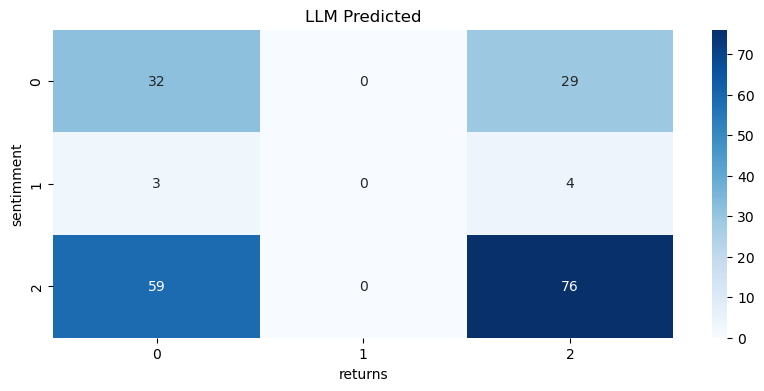

Accuracy: 0.5320
Precision: 0.5320
Recall: 0.5320
F1 Score: 0.5320


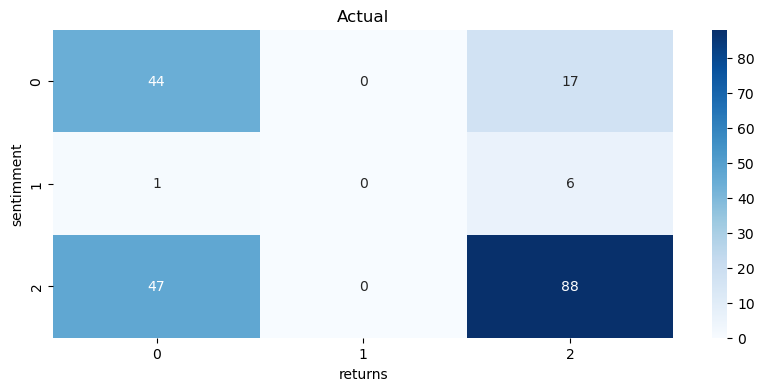

Accuracy: 0.6502
Precision: 0.6502
Recall: 0.6502
F1 Score: 0.6502
^GDAXI
           accuracy  precesion    recall        f1
Predicted  0.532020   0.532020  0.532020  0.532020
Actual     0.650246   0.650246  0.650246  0.650246


In [23]:
pred_accuracy, pred_precision, pred_recall, pred_f1, _ = compute_classification_scores(merged_df['Class_sentiment'], merged_df['Class_pred_returns'], 'LLM Predicted')
actual_accuracy, actual_precision, actual_recall, actual_f1, _ = compute_classification_scores(merged_df['Class_sentiment'], merged_df['Class_actual_returns'], 'Actual')
data = [[pred_accuracy, pred_precision, pred_recall, pred_f1],[actual_accuracy, actual_precision, actual_recall, actual_f1]]
print(asset)
print(pd.DataFrame(data=data, columns=['accuracy', 'precesion', 'recall', 'f1'], index=['Predicted', 'Actual']))

## Plotting Cross-Correlation

Correlation Sentiment & Predicted: 0.18686093793004302
Correlation Sentiment & Actual: 0.4647483141823288


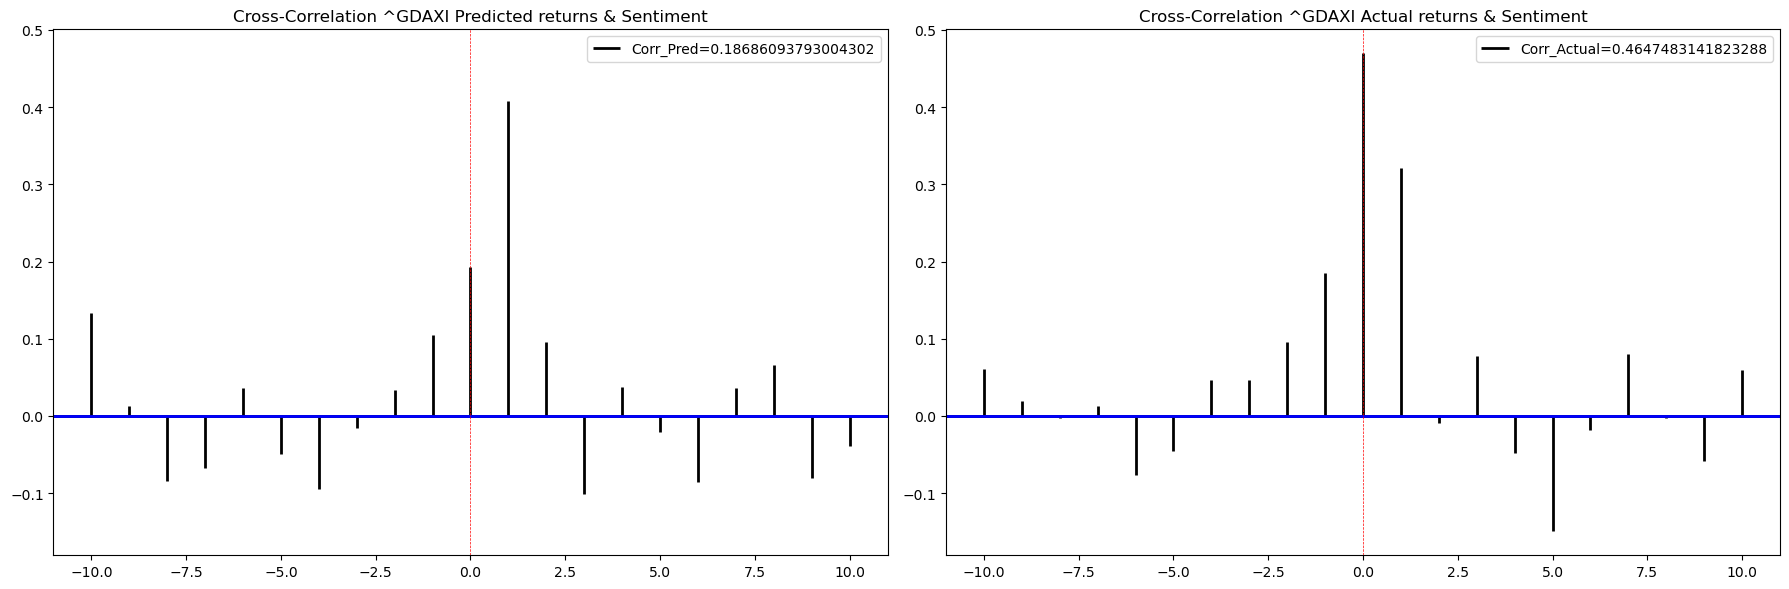

In [27]:
from scipy.stats import pearsonr

# Plot graph
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey = ax1)
 
# cross correlation using xcorr()
scipy_correlation_pred, _ = pearsonr(merged_df['Sentiment'], merged_df['Pred_returns'])
print('Correlation Sentiment & Predicted:', scipy_correlation_pred)
# function
ax1.xcorr(merged_df['Pred_returns'], merged_df['Sentiment'], usevlines=True, maxlags=10, normed=True, lw=2, color='black', label=f'Corr_Pred={scipy_correlation_pred}')
ax1.axhline(0, color='blue', lw=2)
ax1.axvline(0, linestyle='--', color='red', lw=0.5)
ax1.legend()
ax1.set_title(f'Cross-Correlation {asset} Predicted returns & Sentiment')

# cross correlation using xcorr()
scipy_correlation_actual, _ = pearsonr(merged_df['Sentiment'], merged_df['Actual_returns'])
print('Correlation Sentiment & Actual:', scipy_correlation_actual)
# function
ax2.xcorr(merged_df['Actual_returns'], merged_df['Sentiment'], usevlines=True, maxlags=10, normed=True, lw=2, color='black', label=f'Corr_Actual={scipy_correlation_actual}')
ax2.axhline(0, color='blue', lw=2)
ax2.axvline(0, linestyle='--', color='red', lw=0.5)
ax2.legend()
ax2.set_title(f'Cross-Correlation {asset} Actual returns & Sentiment')
 
# show final plotted graph
plt.tight_layout()
plt.savefig('Cross-Correlatiion.png')
plt.show()

## OLS with sentiment

In [40]:
x = merged_df['Sentiment']
y = merged_df['Actual_returns']

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()

# printing the summary table
print(result.summary())
print(result.params)

                            OLS Regression Results                            
Dep. Variable:         Actual_returns   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     55.37
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           2.85e-12
Time:                        11:47:58   Log-Likelihood:                -215.89
No. Observations:                 203   AIC:                             435.8
Df Residuals:                     201   BIC:                             442.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0110      0.050     -0.219      0.8

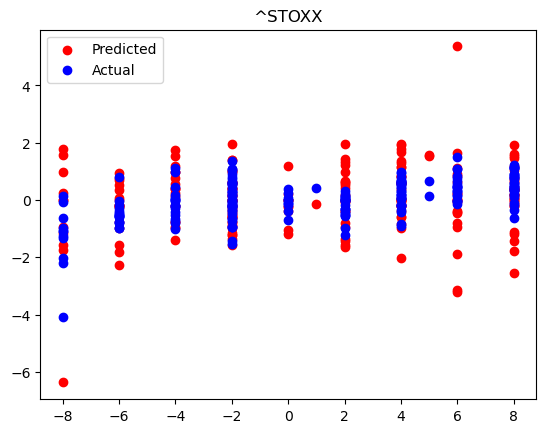

In [25]:
plt.scatter(merged_df['Sentiment'], merged_df['Pred_returns'], color='red', label='Predicted')
plt.scatter(merged_df['Sentiment'], merged_df['Actual_returns'], color='blue', label='Actual')
plt.legend()
plt.title(asset)
plt.show()